In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


#  İskelet Noktası Çıkarımı – (MediaPipe)

Bu bölümde:
- Videolardan bel üstü 17 iskelet noktası çıkarılacak
- Koordinatlar `.npy` dosyasına kaydedilecek
- Daha sonra bu koordinatlar ile benzerlik analizi ve görselleştirme yapılacak


In [4]:
def iskelet_cikar_ve_kaydet(video_path, npy_kayit_adi, video_baslik="Video"):
    """
    Bel üstü 17 iskelet noktasını çıkarır ve .npy olarak kaydeder.
    """
    display(Markdown(f"### 🦴 {video_baslik} - İskelet Noktaları Çıkarılıyor"))

    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=False, model_complexity=1, min_detection_confidence=0.5)

    cap = cv2.VideoCapture(video_path)
    coordinates_sequence = []

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        frame_coordinates = []

        if results.pose_landmarks:
            for i, landmark in enumerate(results.pose_landmarks.landmark):
                if i < 17:
                    x = landmark.x
                    y = landmark.y
                    frame_coordinates.append((x, y))

        coordinates_sequence.append(frame_coordinates)

    cap.release()
    coordinates_sequence = np.array(coordinates_sequence)
    np.save(npy_kayit_adi, coordinates_sequence)

    display(Markdown(f"✅ `{npy_kayit_adi}` dosyasına başarıyla kaydedildi."))


In [5]:
iskelet_cikar_ve_kaydet(
    "C:/Users/The Coder Farmer/Desktop/video1_referans.mp4",
    "video1_referans_koordinatlar.npy",
    "Referans Video"
)

iskelet_cikar_ve_kaydet(
    "C:/Users/The Coder Farmer/Desktop/video2_benzer.mp4",
    "video2_benzer_koordinatlar.npy",
    "Benzer Video"
)

iskelet_cikar_ve_kaydet(
    "C:/Users/The Coder Farmer/Desktop/video3_farkli.mp4",
    "video3_farkli_koordinatlar.npy",
    "Farklı Video"
)


### 🦴 Referans Video - İskelet Noktaları Çıkarılıyor

✅ `video1_referans_koordinatlar.npy` dosyasına başarıyla kaydedildi.

### 🦴 Benzer Video - İskelet Noktaları Çıkarılıyor

✅ `video2_benzer_koordinatlar.npy` dosyasına başarıyla kaydedildi.

### 🦴 Farklı Video - İskelet Noktaları Çıkarılıyor

✅ `video3_farkli_koordinatlar.npy` dosyasına başarıyla kaydedildi.

## .npy Dosyalarının Kordinat Kontrolü

Aşağıda her videodan çıkarılan iskelet koordinatlarının boyutu ve örnekleri incelenecek.


In [1]:
def npy_verisini_incele(dosya_adi, baslik="Veri"):
    veri = np.load(dosya_adi)
    print(f"📦 {baslik} veri boyutu:", veri.shape)

    print(f"\n🔹 İlk karenin 5. noktası (x, y): {veri[0][4]}")
    print(f"\n🔹 İlk 2 karenin koordinatları:")
    print(veri[:2])

# Her veri için çalıştır:
npy_verisini_incele("video1_referans_koordinatlar.npy", "Referans Video")
npy_verisini_incele("video2_benzer_koordinatlar.npy", "Benzer Video")
npy_verisini_incele("video3_farkli_koordinatlar.npy", "Farklı Video")


NameError: name 'np' is not defined

##  Fizibilite Kontrol

In [90]:
def fizibilite_kontrol(npy_dosya):
    veri = np.load(npy_dosya, allow_pickle=True)

    toplam_kare = len(veri)
    dolu_kare = sum(1 for kare in veri if isinstance(kare, (list, np.ndarray)) and len(kare) == 17)
    bos_kare = toplam_kare - dolu_kare

    print("Dosya Adı:", npy_dosya)
    print("Toplam Kare Sayısı:", toplam_kare)
    print("17 Noktası Olan Kare Sayısı:", dolu_kare)
    print("Boş veya Eksik Kare Sayısı:", bos_kare)

    oran = (dolu_kare / toplam_kare) * 100 if toplam_kare > 0 else 0
    print("Fizibilite Oranı: %", round(oran, 2))

    if oran >= 95:
        print("Fizibilite Durumu: Yüksek Kalite")
    elif oran >= 80:
        print("Fizibilite Durumu: Orta Seviye")
    else:
        print("Fizibilite Durumu: Yetersiz")


In [91]:
fizibilite_kontrol("video1_referans_koordinatlar.npy")
fizibilite_kontrol("video2_benzer_koordinatlar.npy")
fizibilite_kontrol("video3_farkli_koordinatlar.npy")


Dosya Adı: video1_referans_koordinatlar.npy
Toplam Kare Sayısı: 207
17 Noktası Olan Kare Sayısı: 207
Boş veya Eksik Kare Sayısı: 0
Fizibilite Oranı: % 100.0
Fizibilite Durumu: Yüksek Kalite
Dosya Adı: video2_benzer_koordinatlar.npy
Toplam Kare Sayısı: 267
17 Noktası Olan Kare Sayısı: 267
Boş veya Eksik Kare Sayısı: 0
Fizibilite Oranı: % 100.0
Fizibilite Durumu: Yüksek Kalite
Dosya Adı: video3_farkli_koordinatlar.npy
Toplam Kare Sayısı: 172
17 Noktası Olan Kare Sayısı: 172
Boş veya Eksik Kare Sayısı: 0
Fizibilite Oranı: % 100.0
Fizibilite Durumu: Yüksek Kalite


##  İlk Kare İskelet Noktaları

Aşağıda referans, benzer ve farklı videolara ait ilk karedeki 17 üst gövde noktasının dağılımları gösterilmiştir.


In [92]:
def gorsel_karsilastirma():
    dosyalar = [
        ("video1_referans_koordinatlar.npy", "Referans Video"),
        ("video2_benzer_koordinatlar.npy", "Benzer Video"),
        ("video3_farkli_koordinatlar.npy", "Farklı Video")
    ]

    plt.figure(figsize=(15, 4))

    for i, (dosya, baslik) in enumerate(dosyalar):
        veri = np.load(dosya)
        ilk_kare = veri[0]
        x = [n[0] for n in ilk_kare]
        y = [n[1] for n in ilk_kare]

        plt.subplot(1, 3, i + 1)
        plt.scatter(x, y, c='red')
        plt.title(baslik)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.gca().invert_yaxis()
        plt.grid(True)

    plt.tight_layout()
    plt.show()


In [93]:
gorsel_karsilastirma()


## Zamana Bağlı Hareket Analizi

In [94]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def iskelet_animasyon_gomulu(npy_dosya, baslik="Video"):
    veri = np.load(npy_dosya, allow_pickle=True)
    veri = [frame for frame in veri if isinstance(frame, (list, np.ndarray)) and len(frame) == 17]
    if len(veri) == 0:
        print(f"❌ {baslik}: Geçerli veri bulunamadı.")
        return

    veri = np.array(veri)
    fig, ax = plt.subplots()
    scat = ax.scatter([], [], c='red')
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)
    ax.set_title(f"{baslik} - Animasyon")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)

    def init():
        scat.set_offsets(np.empty((0, 2)))  
        return scat,

    def update(frame):
        scat.set_offsets(veri[frame])
        return scat,

    anim = FuncAnimation(fig, update, frames=len(veri), init_func=init, blit=True, interval=80)
    plt.close(fig)
    return HTML(anim.to_jshtml())


In [95]:
iskelet_animasyon_gomulu("video2_benzer_koordinatlar.npy", "Referans Video")


## Benzerlik (Öklid Mesafesi)

In [96]:
import numpy as np

def oklid_benzerlik(dosya1, dosya2):
    # NPY dosyalarını yükle
    veri1 = np.load(dosya1)
    veri2 = np.load(dosya2)

    # Her karede 17 nokta (bel üstü) olmalı
    veri1 = [kare for kare in veri1 if len(kare) == 17]
    veri2 = [kare for kare in veri2 if len(kare) == 17]

    # İki video farklı uzunlukta olabilir, en az ortak kare kadar karşılaştır
    kare_sayisi = min(len(veri1), len(veri2))
    veri1 = np.array(veri1[:kare_sayisi])
    veri2 = np.array(veri2[:kare_sayisi])

    # İki videonun farklarını al
    fark = veri1 - veri2

    # Her nokta için Öklid mesafesini hesapla
    mesafeler = np.linalg.norm(fark, axis=2)

    # Ortalama farkı al
    ortalama_mesafe = np.mean(mesafeler)

    return round(ortalama_mesafe, 4)


In [97]:
referans_vs_benzer = oklid_benzerlik("video1_referans_koordinatlar.npy", "video2_benzer_koordinatlar.npy")
referans_vs_farkli = oklid_benzerlik("video1_referans_koordinatlar.npy", "video3_farkli_koordinatlar.npy")

print("Referans ile Benzer Video Mesafesi:", referans_vs_benzer)
print("Referans ile Farklı Video Mesafesi:", referans_vs_farkli)


Referans ile Benzer Video Mesafesi: 0.0663
Referans ile Farklı Video Mesafesi: 0.2542


## Grafik çizimi

In [98]:
def ortalama_nokta_konumu(veri):
    # Her karedeki tüm (x, y) noktalarının ortalamasını al
    return [np.mean(frame, axis=0) for frame in veri if len(frame) == 17]

def referans_karsilastirma_grafik(referans_npy, diger_npy, baslik="Benzer Video"):
    ref = np.load(referans_npy)
    diger = np.load(diger_npy)

    # Sadece 17 noktalı kareleri al
    ref = [f for f in ref if len(f) == 17]
    diger = [f for f in diger if len(f) == 17]

    kare_sayisi = min(len(ref), len(diger))
    ref = ref[:kare_sayisi]
    diger = diger[:kare_sayisi]

    # Ortalama (x,y) koordinatlarını hesapla
    ref_ort = np.array(ortalama_nokta_konumu(ref))
    diger_ort = np.array(ortalama_nokta_konumu(diger))

    # Her karede sadece y ekseni (dikey hareket) karşılaştırılsın istiyoruz
    ref_y = ref_ort[:, 1]
    diger_y = diger_ort[:, 1]

    # Grafik
    plt.figure(figsize=(10, 5))
    plt.plot(ref_y, label="Referans", linestyle='--', marker='o')
    plt.plot(diger_y, label=baslik, linestyle='-', marker='x')
    plt.title(f"📉 Referans vs {baslik} - Ortalama Y Koordinatı")
    plt.xlabel("Kare Numarası")
    plt.ylabel("Y Koordinatı (Ortalama)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


C:\Users\The Coder Farmer\AppData\Local\Temp\ipykernel_10400\879730383.py:34: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\The Coder Farmer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


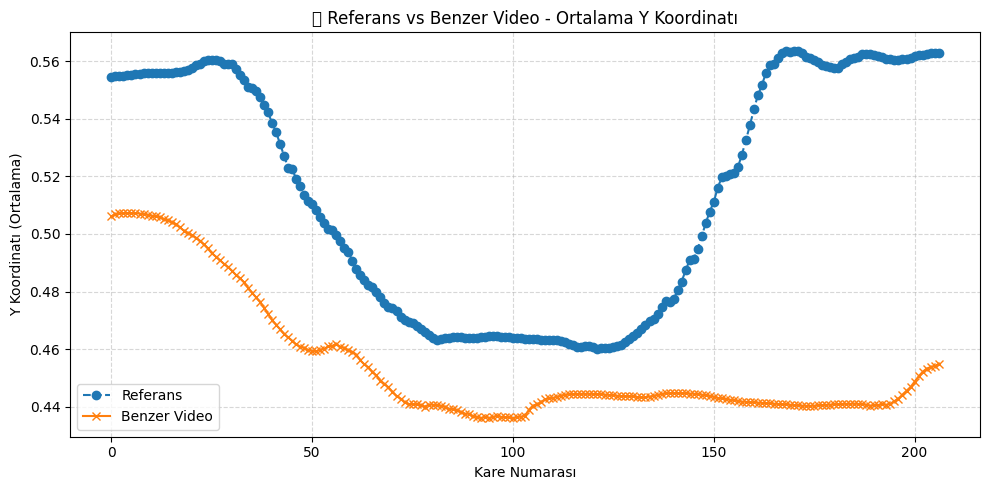

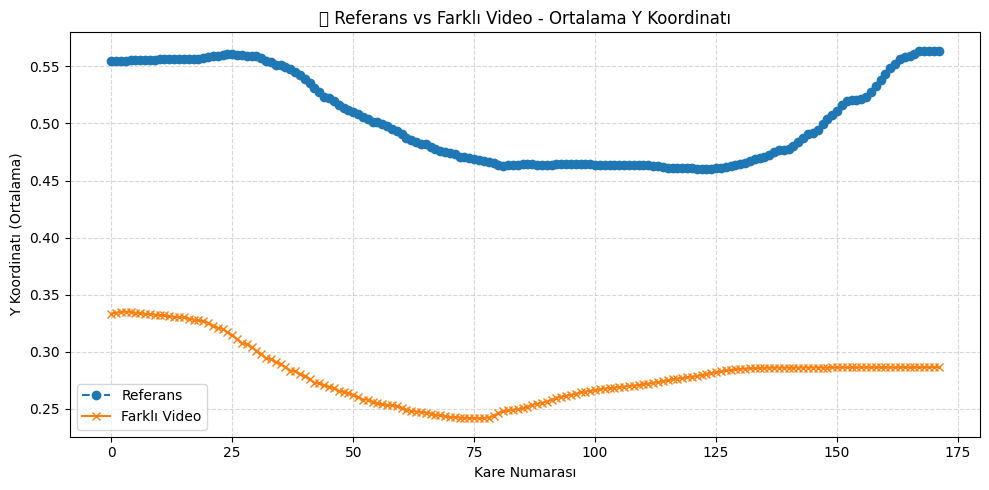

In [99]:
referans_karsilastirma_grafik("video1_referans_koordinatlar.npy", "video2_benzer_koordinatlar.npy", "Benzer Video")
referans_karsilastirma_grafik("video1_referans_koordinatlar.npy", "video3_farkli_koordinatlar.npy", "Farklı Video")


#  Autoencoder Örneği
Bu çalışmada, insan hareket verilerinden oluşan 17 vücut noktasının (x, y) koordinatlarını alarak toplam 34 boyutlu bir veri kümesi ile autoencoder modeli oluşturacağız. Amaç:
- Veriyi daha az boyutlu bir öz bilgi (embedding) haline getirmek
- Sıkıştırılmış vektörden orijinal veriyi yeniden üretmek
- Modelin öğrenme başarısını gözlemlemek


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


## 🔹 Veri Hazırlığı
Her frame'de 17 adet vücut noktası var. Her biri (x, y) olduğu için toplamda 34 özellik (feature) oluşur. Gerçek veri yerine, örnek olarak rastgele 1000 frame’lik bir simülasyon verisi üretiyoruz.


In [101]:
num_features = 34  # 17 nokta * 2 koordinat (x ve y)
num_samples = 1000  # toplam frame sayısı (örnek sayısı)

# Rastgele simülasyon verisi
X = np.random.rand(num_samples, num_features).astype("float32")

# Eğitim ve test seti olarak ayır (80% eğitim, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


## 🔹 Autoencoder Mimarisi
Bu mimari, bir girdi vektörünü önce sıkıştırır (encoder), sonra tekrar açmaya çalışır (decoder).  
Amaç, modelin önemli bilgileri öğrenip öğrenemediğini test etmektir.

- **Girdi:** 34 boyutlu vektör (17 nokta)
- **Encoder:** 34 → 24 → 16 → 10
- **Decoder:** 10 → 16 → 24 → 34


In [102]:
input_layer = Input(shape=(num_features,))

# Encoder kısmı
x = Dense(24, activation='relu')(input_layer)
x = Dense(16, activation='relu')(x)
encoded = Dense(10, activation='relu')(x)

# Decoder kısmı
x = Dense(16, activation='relu')(encoded)
x = Dense(24, activation='relu')(x)
output_layer = Dense(num_features, activation='sigmoid')(x)

# Modeli oluştur
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Modeli derle
autoencoder.compile(optimizer=Adam(0.001), loss='mse')


## 🔹 Model Eğitimi
Model, X_train verisini giriş olarak alır ve aynı veriyi çıkış olarak tahmin etmeye çalışır.  
Bu işlem 50 epoch boyunca tekrar edilir.


In [103]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(X_test, X_test)
)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0837 - val_loss: 0.0828
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0829 - val_loss: 0.0825
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0826 - val_loss: 0.0821
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0818 - val_loss: 0.0811
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0806 - val_loss: 0.0798
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0788 - val_loss: 0.0786
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0773 - val_loss: 0.0776
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0766 - val_loss: 0.0764
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0752 - val_loss: 0.0753
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0742 - val_loss: 0.0743
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0729 - val_loss: 0.0737
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0723 - val_l

## 🔹 Modelin Öğrenme Performansı
Eğitim tamamlandıktan sonra test verisinden bazı örnekler seçilir.  
Giriş (gerçek) ve modelin çıkışı (tahmin) görsel olarak karşılaştırılır.


In [104]:
X_test_pred = autoencoder.predict(X_test)

plt.figure(figsize=(15, 6))
for i in range(5):
    # Giriş vektörü
    plt.subplot(2, 5, i + 1)
    plt.plot(X_test[i], label="Giriş")
    plt.title(f"Giriş {i+1}")
    plt.xticks([])

    # Modelin tahmini
    plt.subplot(2, 5, i + 6)
    plt.plot(X_test_pred[i], label="Çıkış", color='orange')
    plt.title(f"Çıkış {i+1}")
    plt.xticks([])

plt.tight_layout()
plt.suptitle("Autoencoder: Giriş ve Yeniden Üretilmiş Çıkış", y=1.05)
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


## Sonuç 
Bu basit Autoencoder modeli:
-2D koordinatları 10 boyutlu sıkıştırılmış temsillere dönüştürür.
-Orijinal veriyi yeniden üretmeye çalışır.
-Modelin öğrenme başarısı çizilen grafiklerden gözlemlenebilir.
-Bu embedding’ler, farklı videolardaki hareketlerin özünü temsil ettiği için benzerlik ölçümlerinde doğrudan karşılaştırılabilir. Bu yapı, PDF makaledeki "action feature space" mantığını sade bir örnekle uygulamaya döker.

İleri aşamada bu 10 boyutluk embedding'ler DTW veya Cosine Similarity ile hareket benzerliği karşılaştırmalarında kullanılabilir.


##  DTW ile Benzerlik Ölçümü

Autoencoder'dan çıkan 10 boyutluk embedding vektörleri, her frame'in hareket özünü temsil eder.
Bu vektörler, zaman içinde dizilir ve DTW algoritması ile hizalanarak benzerlik skoru elde edilir.

DTW, iki zaman serisini hizalayarak toplam mesafeyi en aza indirmeyi amaçlar. Farklı uzunluktaki dizilerde de çalışır.


In [108]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from tensorflow.keras.models import Model

# Encoder'ı al
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[3].output)

# Örnek 2 hareket dizisi
seq1 = X_test[:30]
seq2 = X_test[30:60]

# Her frame için embedding çıkar
embedding_seq1 = encoder_model.predict(seq1)
embedding_seq2 = encoder_model.predict(seq2)

# DTW ile mesafeyi hesapla
distance, path = fastdtw(embedding_seq1, embedding_seq2, dist=euclidean)
print(f"DTW Mesafesi (fastdtw): {distance:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
DTW Mesafesi (fastdtw): 70.1408


In [109]:
seq3 = X_test[:30]     # ilk hareket
seq4 = X_test[:30]     # kendisiyle aynı (aynı hareket)

# Aynı dizilerin embedding'lerini al
embedding_seq3 = encoder_model.predict(seq3)
embedding_seq4 = encoder_model.predict(seq4)

distance_same, _ = fastdtw(embedding_seq3, embedding_seq4, dist=euclidean)
print(f"Aynı dizilerin DTW mesafesi: {distance_same:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Aynı dizilerin DTW mesafesi: 0.0000


##  DTW Hizalamasında cosine Similarity Grafiği

Bu grafikte, iki farklı hareket dizisinin encoder (embedding) çıktıları arasında yapılan DTW (Dynamic Time Warping) hizalamasına göre her bir frame çifti için Cosine Similarity hesaplanmıştır.

- **Cosine Similarity** değeri `1`'e ne kadar yakınsa, o iki frame'in hareket temsili (embedding'i) o kadar benzerdir.
- Zigzaglar, bazı frame çiftlerinin oldukça farklı olduğunu; düz giden bölgeler ise akışın uyumlu olduğunu gösterir.

 Bu analiz sayesinde:
- Hangi frame çiftlerinin benzer olduğunu,
- DTW’nin zaman kaymalarına rağmen nasıl hizalama yaptığını,
- Modelin hareket özünü ne kadar doğru temsil ettiğini görebiliriz.

Ortalama Cosine Similarity skoru, modelin genel benzerlik başarısını da sayısal olarak değerlendirmemize olanak sağlar.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


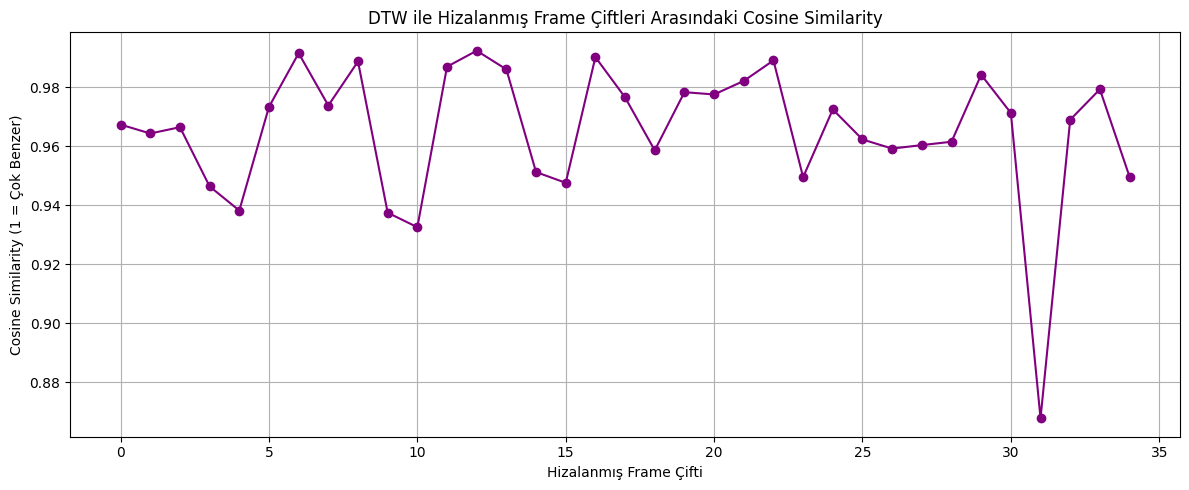

In [110]:
from fastdtw import fastdtw
from scipy.spatial.distance import cosine
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Encoder modelini al
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[3].output)

# Örnek 2 diziyi seç (30 frame)
seq1 = X_test[:30]
seq2 = X_test[30:60]

# Embedding'leri al
embedding_seq1 = encoder_model.predict(seq1)
embedding_seq2 = encoder_model.predict(seq2)

# DTW hizalama
_, path = fastdtw(embedding_seq1, embedding_seq2)

# Cosine similarity hesapla
cosine_similarities = []
for i, j in path:
    sim = 1 - cosine(embedding_seq1[i], embedding_seq2[j])
    cosine_similarities.append(sim)

# Grafik çizimi
plt.figure(figsize=(12, 5))
plt.plot(range(len(cosine_similarities)), cosine_similarities, marker='o', color='purple')
plt.title("DTW ile Hizalanmış Frame Çiftleri Arasındaki Cosine Similarity")
plt.xlabel("Hizalanmış Frame Çifti")
plt.ylabel("Cosine Similarity (1 = Çok Benzer)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(f"Ortalama Cosine Similarity: {np.mean(cosine_similarities):.4f}")
#ortalama değer çok benzer

Ortalama Cosine Similarity: 0.9652


##  Cosine Similarity ve Euclidean Distance Karşılaştırması

Bu çalışmada, Autoencoder modelinden elde edilen embedding vektörlerini karşılaştırmak için iki farklı yöntem kullanılmıştır:

###  1. Euclidean Distance (Öklidyen Mesafe)
- İki vektör arasındaki **sayısal farkı** ölçer.
- Formülü:  
- Büyüklük önemlidir; vektörün yönünden ziyade değerleri ne kadar farklı ona bakar.
- **0**’a yaklaştıkça benzerlik artar.

###  2. Cosine Similarity (Açısal Benzerlik)
- İki vektörün **aynı yöne bakıp bakmadığını** ölçer.
- Formülü:  
- Büyüklüğü değil, **yönü** dikkate alır.
- **1**’e yaklaştıkça benzerlik artar.

### Uygulama:
- Aynı uzunluktaki iki hareket dizisi için her frame çifti karşılaştırılmıştır.
- Her frame'in embedding’i karşılaştırılarak:
  - Cosine benzerlikler


In [112]:
from scipy.spatial.distance import cosine, euclidean
from tensorflow.keras.models import Model

# Encoder modelini al
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[3].output)

# 2 hareket dizisi seç (30 frame'lik)
seq1 = X_test[:30]
seq2 = X_test[30:60]

# Her frame için embedding vektörünü çıkar
embedding_seq1 = encoder_model.predict(seq1)
embedding_seq2 = encoder_model.predict(seq2)

# Karşılaştırma metrikleri
cosine_similarities = []
euclidean_distances = []

for i in range(len(embedding_seq1)):
    cos_sim = 1 - cosine(embedding_seq1[i], embedding_seq2[i])
    euc_dist = euclidean(embedding_seq1[i], embedding_seq2[i])

    cosine_similarities.append(cos_sim)
    euclidean_distances.append(euc_dist)

# Ortalama benzerlik ve uzaklık değerleri
avg_cosine = np.mean(cosine_similarities)
avg_euclidean = np.mean(euclidean_distances)

print(f"Ortalama Cosine Similarity: {avg_cosine:.4f}")
print(f"Ortalama Euclidean Distance: {avg_euclidean:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Ortalama Cosine Similarity: 0.9465
Ortalama Euclidean Distance: 2.6014


# Kendi Verilerimiz ile Autoncoder (6 videp)

## 1 .npy dosyalarını oku

In [121]:
import numpy as np

referans = np.load("video1_referans_koordinatlar.npy")
benzer = np.load("video2_benzer_koordinatlar.npy")
farkli = np.load("video3_farkli_koordinatlar.npy")

print("Referans:", referans.shape)
print("Benzer  :", benzer.shape)
print("Farklı  :", farkli.shape)


Referans: (207, 17, 2)
Benzer  : (267, 17, 2)
Farklı  : (172, 17, 2)


## Autoencoder encoder'ı ile embedding çıkarma

In [122]:
referans = referans.reshape(referans.shape[0], -1)
benzer = benzer.reshape(benzer.shape[0], -1)
farkli = farkli.reshape(farkli.shape[0], -1)


In [123]:
# Encoder modeli tanımı
from tensorflow.keras.models import Model
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[3].output)

# Embedding'leri çıkar
emb_ref = encoder_model.predict(referans)
emb_benzer = encoder_model.predict(benzer)
emb_farkli = encoder_model.predict(farkli)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


## DTW ve Cosine Similarity hesapla

In [127]:
from fastdtw import fastdtw  # FastDTW algoritmasını import eder – zaman serisi benzerliği ölçmek için kullanılır
from scipy.spatial.distance import cosine  # Vektörler arası Cosine mesafesini ölçmek için

# İki embedding dizisi arasındaki ortalama cosine benzerliğini hesaplayan fonksiyon
def cosine_avg(seq1, seq2):
    return np.mean([1 - cosine(a, b) for a, b in zip(seq1, seq2)])
    # cosine(a, b) mesafedir → 1 - cosine(a, b) benzerlik olur
    # Tüm çiftler için hesaplanır ve ortalaması alınır

# DTW mesafesini hesaplayan fonksiyon
def dtw_dist(seq1, seq2):
    dist, _ = fastdtw(seq1, seq2)  # fastdtw, iki vektör dizisi arasında optimal zaman eşleşme mesafesini verir
    return dist

# Referans video ile benzer video karşılaştırması
print("Referans ↔ Benzer")
print("Cosine Similarity:", cosine_avg(emb_ref, emb_benzer))  # Cosine benzerliğini yazdırır
print("DTW Mesafesi     :", dtw_dist(emb_ref, emb_benzer))     # DTW mesafesini yazdırır

# Referans video ile farklı video karşılaştırması
print("\nReferans ↔ Farklı")
print("Cosine Similarity:", cosine_avg(emb_ref, emb_farkli))  # Cosine benzerliğini yazdırır
print("DTW Mesafesi     :", dtw_dist(emb_ref, emb_farkli))     # DTW mesafesini yazdırır


Referans ↔ Benzer
Cosine Similarity: 0.9986254516758017
DTW Mesafesi     : 213.4466245174408

Referans ↔ Farklı
Cosine Similarity: 0.979556078300543
DTW Mesafesi     : 1297.6052964478731


##  DTW Path Karşılaştırması

In [ ]:
from fastdtw import fastdtw  # Fast Dynamic Time Warping algoritmasını içe aktarır
import matplotlib.pyplot as plt  # Grafik çizimi için matplotlib kullanılır

# Referans ↔ Benzer video için DTW path'ini hesapla
_, path_benzer = fastdtw(emb_ref, emb_benzer)  # fastdtw iki zaman serisi arasındaki en uygun eşleşme yolunu verir
x_benzer = [i for i, j in path_benzer]  # Referans videodaki frame indeksleri
y_benzer = [j for i, j in path_benzer]  # Benzer videodaki eşleşen frame indeksleri

# Referans ↔ Farklı video için DTW path'ini hesapla
_, path_farkli = fastdtw(emb_ref, emb_farkli)
x_farkli = [i for i, j in path_farkli]  # Referans videodaki frame indeksleri
y_farkli = [j for i, j in path_farkli]  # Farklı videodaki eşleşen frame indeksleri

#  Grafik çizimi
plt.figure(figsize=(7, 7))  # Grafik boyutu (inç cinsinden)

# Benzer hareketin eşleşme path'ini çiz (yeşil çizgi)
plt.plot(x_benzer, y_benzer, label="Benzer Hareket", color="seagreen", linewidth=2)

# Farklı hareketin eşleşme path'ini çiz (turuncu kesik çizgi)
plt.plot(x_farkli, y_farkli, label="Farklı Hareket", color="orange", linestyle="--", linewidth=2)

# Başlık ve etiketler
plt.title("DTW Path: Frame Eşleşme Karşılaştırması")
plt.xlabel("Referans Video Frame No")
plt.ylabel("Diğer Video Frame No")

plt.grid(True)       # Izgara çizgileri
plt.legend()         # Etiketleri göster
plt.tight_layout()   # Kenar boşluklarını otomatik ayarla
plt.show()           # Grafiği göster


# Cosine benzerliği yüksek olan (1'e yakı


#  Autoencoder Eğitimi ve Testi

**Proje Dizini:**  
`C:\Users\The Coder Farmer\Desktop\2024_Yidan_Human motion similarity evaluation based on deep metric learning`

**Video Dosyaları:**  
- Eğitim: `video1.mp4` … `video5.mp4`  
- Test:    `video6.mp4`

Her videodan sadece **bel üstü 17 nokta** (X,Y) koordinatları çıkarılacak ve `.npy` dosyalarına kaydedilecek.  
Sonra 5 eğitim videosuyla autoencoder eğitilecek, 6. videoyla test latent’leri alınacak.


In [1]:
# Dosya ve sayı işlemleri için
import os
import numpy as np

# Video işleme ve landmark çıkarımı için
import cv2
import mediapipe as mp

# Model tanımı ve eğitim için PyTorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim


## 1. Üst Vücut Landmark İndekslerinin Tanımlanması

MediaPipe Pose, 33 nokta çıkarır. Biz 17 bel üstü noktayı aşağıdaki listeden seçeceğiz.


In [2]:
# MediaPipe PoseLandmark'dan seçilen 17 nokta
UPPER_BODY_LANDMARKS = [
    mp.solutions.pose.PoseLandmark.NOSE,
    mp.solutions.pose.PoseLandmark.LEFT_EYE_INNER,
    mp.solutions.pose.PoseLandmark.LEFT_EYE,
    mp.solutions.pose.PoseLandmark.LEFT_EYE_OUTER,
    mp.solutions.pose.PoseLandmark.RIGHT_EYE_INNER,
    mp.solutions.pose.PoseLandmark.RIGHT_EYE,
    mp.solutions.pose.PoseLandmark.RIGHT_EYE_OUTER,
    mp.solutions.pose.PoseLandmark.LEFT_SHOULDER,
    mp.solutions.pose.PoseLandmark.RIGHT_SHOULDER,
    mp.solutions.pose.PoseLandmark.LEFT_ELBOW,
    mp.solutions.pose.PoseLandmark.RIGHT_ELBOW,
    mp.solutions.pose.PoseLandmark.LEFT_WRIST,
    mp.solutions.pose.PoseLandmark.RIGHT_WRIST,
    mp.solutions.pose.PoseLandmark.LEFT_EAR,
    mp.solutions.pose.PoseLandmark.RIGHT_EAR,
    mp.solutions.pose.PoseLandmark.MOUTH_LEFT,
    mp.solutions.pose.PoseLandmark.MOUTH_RIGHT
]


## 2. MediaPipe Pose Nesnesini Oluşturma


In [3]:
# MediaPipe Pose modelini konfigüre et
mp_pose = mp.solutions.pose.Pose(
    static_image_mode=False,       # Video akışı için False
    model_complexity=1,            # Orta seviye model
    enable_segmentation=False,     # Segmentasyon kapalı
    min_detection_confidence=0.5   # Minimum tespit güveni
)


## 3. Video’dan 17 Nokta (X,Y) Çıkarımı ve `.npy` Kaydı


In [4]:
def extract_upper_body_keypoints(video_path, save_path):
    """
    video_path: Girdi video dosyası (.mp4)
    save_path:  Çıktı .npy dosyası
    İşlev: Her frame için 17 nokta (X,Y) çıkarır, (num_frames,34) array şeklinde kaydeder.
    """
    cap = cv2.VideoCapture(video_path)      # Video dosyasını aç
    landmarks = []                          # Çıkarılan koordinatları biriktir

    while True:
        ret, frame = cap.read()
        if not ret:
            break                           # Video bittiğinde döngüden çık
        # BGR → RGB dönüşümü
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Landmark tespiti
        result = mp_pose.process(frame_rgb)

        if result.pose_landmarks:
            pts = []
            # 17 noktayı sırayla al, X ve Y değerlerini ekle
            for lm_enum in UPPER_BODY_LANDMARKS:
                lm = result.pose_landmarks.landmark[lm_enum]
                pts.extend([lm.x, lm.y])
        else:
            # Landmark bulunamazsa 34 sıfır koy
            pts = [0.0] * 34

        landmarks.append(pts)

    cap.release()                           # Kaynakları serbest bırak
    arr = np.array(landmarks)              # Listeyi NumPy array'e çevir
    np.save(save_path, arr)                # .npy olarak kaydet
    return arr.shape                       # (num_frames,34) döndür

# Yol tanımları
base_in  = r"C:\Users\The Coder Farmer\Desktop"
base_out = r"C:\Users\The Coder Farmer\Desktop\2024_Yidan_Human motion similarity evaluation based on deep metric learning"

# Eğitim videoları (1–5) için .npy çıkarımı
for i in range(1, 6):
    inp = os.path.join(base_in, f"video{i}.mp4")
    out = os.path.join(base_out, f"video{i}.npy")
    shape = extract_upper_body_keypoints(inp, out)
    print(f"video{i}.npy kaydedildi, shape = {shape}")

# Test videosu (6) için .npy çıkarımı
shape6 = extract_upper_body_keypoints(
    os.path.join(base_in, "video6.mp4"),
    os.path.join(base_out, "video6.npy")
)
print(f"video6.npy kaydedildi, shape = {shape6}")


video1.npy kaydedildi, shape = (170, 34)
video2.npy kaydedildi, shape = (167, 34)
video3.npy kaydedildi, shape = (182, 34)
video4.npy kaydedildi, shape = (190, 34)
video5.npy kaydedildi, shape = (167, 34)
video6.npy kaydedildi, shape = (173, 34)


## 4. Sliding Window ile Örnek Setlerini Oluşturma

- Her pencere: 30 frame  
- Stride (kaydırma): 1 frame  
- Her örnek: `30 × 34 = 1020` boyut


In [5]:
def create_windows(data, window_size=30, stride=1):
    """
    data: NumPy array, shape = (num_frames, 34)
    return: shape = (num_windows, window_size * 34)
    """
    N, D = data.shape
    windows = []
    for start in range(0, N - window_size + 1, stride):
        w = data[start:start+window_size].flatten()#tüm frame'leri yazar . tek bir vektör haline getirir flaten ile (30*34=1020)
        windows.append(w)  # 1020 boyutlu 1 pencereyi windows listesine ekler 
    return np.array(windows) # numpy dizisine çevirir ve döndürür

# Tüm eğitim videolarını birleştir aynı işlemleri döngüde yaparak 
train_windows = []
for i in range(1, 6):
    arr = np.load(os.path.join(base_out, f"video{i}.npy"))
    w   = create_windows(arr, window_size=30, stride=1)
    train_windows.append(w)
train_windows = np.vstack(train_windows)  # Hepsini yanyana ekle
print("Toplam eğitim örnek sayısı:", train_windows.shape)


Toplam eğitim örnek sayısı: (731, 1020)


## 5. Autoencoder Model Tanımı
 


In [6]:
class MotionAutoencoder(nn.Module):   # Pytorchun sinir ağı sınıfından türetilir(kalıtım ile )
    def __init__(self, input_dim=30*34, latent_dim=128):
        super().__init__()   # modelin katmanlarını tanımlamak için üst sınıfı çağır

        # Encoder: 1020 → 512 → 256 → latent_dim

        self.encoder = nn.Sequential(  # içine yazdığımz katmanları sırayla uygular sequential ile
            
            nn.Linear(input_dim, 512),  # Girdi boyutu 1020 (30×34) → ara katman 512 nöron
            nn.ReLU(),  #Doğrusal olmayan aktivasyon başlatır çevirir yani
            nn.Linear(512, 256), # 512 → 256 çevirimi 
            nn.ReLU(), # aktivasyon
            nn.Linear(256, latent_dim) #256 → 128 boyutlu “latent” (gizli) vektör halini alır 
        )

        # Decoder: latent_dim → 256 → 512 → 1020  encoder işleminin tersini yapar
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim)
        )

    def forward(self, x): # forward metodu çalışma sırasında çağrılır

        z = self.encoder(x)   # Gizli temsil gelen x önce encoder sonra decoder katmanlarından geçer
        x_rec = self.decoder(z)  # çıktı oluşan yeni yapılandırılmış pencere verisi 
        return x_rec

# Modeli oluştur
model = MotionAutoencoder(input_dim=30*34, latent_dim=128) # sınıfı örnekleyerek model oluşturur ve model tensor ile erişebiliriz


## 6. Eğitim İçin DataLoader ve Optimizatör

- Eğitim serimizi modele sunacağız ve optimize edeceğiz

In [7]:

# Numpy array’leri (train_windows bir NumPy dizisi) GPU/CPU hızlandırmalı işlemlerde kullanabilmek için torch.tensor(...) ile PyTorch tensörüne dönüştürüyoruz.
X_tensor = torch.tensor(train_windows, dtype=torch.float32)  # NumPy → Tensor
dataset  = TensorDataset(X_tensor)                            # Tensörü Dataset’e sar
loader   = DataLoader(dataset, batch_size=32, shuffle=True)   # 32’lik batch’ler, karıştırma açık

# Kayıp Fonksiyonu ve Optimizatör Tanımı
criterion = nn.MSELoss()                                     # Girdi ile rekonstrüksiyon arası Ortalama Kare Hatası
optimizer = optim.Adam(model.parameters(), lr=1e-3)          # Adam optimizatörü, öğrenme hızı 0.001


## 7. Modeli Eğitme 


In [8]:
num_epochs = 50
for epoch in range(1, num_epochs+1):
    model.train()                    # 1. Eğitim moduna al (dropout, batchnorm gibi katmanlar buna göre davranır)
    total_loss = 0.0

    for (batch,) in loader:          # 2. Her batch’i sırayla al
        reconstructed = model(batch) #    İleri geçiş (forward pass): girdi → model → çıktı
        loss = criterion(reconstructed, batch)  
                                      #     Kayıp hesaplama: model çıktısı ile gerçek girdi arasındaki fark 
        optimizer.zero_grad()        #     Önceki adımın gradient’lerini sıfırla
        loss.backward()              #     Geri yayılım (backward pass): loss’a göre ağırlıkların gradient’ini hesapla
        optimizer.step()             #     Optimizör adımı: gradient’leri kullanarak ağırlıkları güncelle

        total_loss += loss.item()    #    O andan itibaren bu batch’in kaybını biriktir

    avg_loss = total_loss / len(loader)  #toplam kaybı / batch sayısı ile ortalama kaybı hesapladık
    print(f"Epoch {epoch:02d}/{num_epochs} — Loss: {avg_loss:.4f}")


Epoch 01/50 — Loss: 0.0682
Epoch 02/50 — Loss: 0.0069
Epoch 03/50 — Loss: 0.0048
Epoch 04/50 — Loss: 0.0046
Epoch 05/50 — Loss: 0.0045
Epoch 06/50 — Loss: 0.0045
Epoch 07/50 — Loss: 0.0046
Epoch 08/50 — Loss: 0.0045
Epoch 09/50 — Loss: 0.0045
Epoch 10/50 — Loss: 0.0044
Epoch 11/50 — Loss: 0.0044
Epoch 12/50 — Loss: 0.0043
Epoch 13/50 — Loss: 0.0042
Epoch 14/50 — Loss: 0.0038
Epoch 15/50 — Loss: 0.0026
Epoch 16/50 — Loss: 0.0023
Epoch 17/50 — Loss: 0.0022
Epoch 18/50 — Loss: 0.0022
Epoch 19/50 — Loss: 0.0021
Epoch 20/50 — Loss: 0.0019
Epoch 21/50 — Loss: 0.0017
Epoch 22/50 — Loss: 0.0014
Epoch 23/50 — Loss: 0.0010
Epoch 24/50 — Loss: 0.0008
Epoch 25/50 — Loss: 0.0007
Epoch 26/50 — Loss: 0.0007
Epoch 27/50 — Loss: 0.0006
Epoch 28/50 — Loss: 0.0006
Epoch 29/50 — Loss: 0.0006
Epoch 30/50 — Loss: 0.0006
Epoch 31/50 — Loss: 0.0006
Epoch 32/50 — Loss: 0.0005
Epoch 33/50 — Loss: 0.0005
Epoch 34/50 — Loss: 0.0005
Epoch 35/50 — Loss: 0.0005
Epoch 36/50 — Loss: 0.0005
Epoch 37/50 — Loss: 0.0005
E

## 8. Test Videosu İçin Latent Vektör Çıkarımı


In [9]:
# Test verisini yüklüyoruz
test_arr     = np.load(os.path.join(base_out, "video6.npy"))  
# → video6.npy içindeki (num_frames, 34) boyutlu 2D koordinat dizisini yükler

test_windows = create_windows(test_arr, window_size=30, stride=1)  
# → Aynı eğitimde yaptığımız gibi, 30 frame’lik pencereleri ardışık (stride=1) oluşturur
#    test_windows shape = (n_windows_test, 1020)

test_tensor  = torch.tensor(test_windows, dtype=torch.float32)  
# → NumPy dizisini PyTorch tensörüne çevirir; model ile GPU/CPU uyumu için gerekli


# Modeli değerlendirme moduna aldık
model.eval()

with torch.no_grad():  
    # Geri yayılım (gradient) takibi kapalı: sadece çıkarım (inference) yapıyoruz

    # Encoder kısmına sokup latent vektörleri al
    z_test = model.encoder(test_tensor).cpu().numpy()  
    #  model.encoder, input_dim=1020 → latent_dim=128 boyutuna indirger
    #  cpu().numpy() ile CPU’ya alıp NumPy dizisine çevirir
    #    z_test shape = (n_windows_test, 128)

    # Kaydet
    np.save(os.path.join(base_out, "video6_latent.npy"), z_test)  
    # → Test videoya ait latent vektörleri video6_latent.npy olarak diske yazar


print("Test videoya ait latent vektörler kaydedildi:", z_test.shape)
#  Ekrana (144, 128) gibi bir çıktı verecek
#     144 = test penceresi sayısı
#     128 = latent_dim



Test videoya ait latent vektörler kaydedildi: (144, 128)


## 9. Eğitim Videoları İçin Latent Vektör Çıkarımı ve Kaydı


In [10]:
import os
import numpy as np
import torch

# Aynı MotionAutoencoder tanımı ve model objesi
model.eval()  # Eğitim bittiyse zaten eval modunda

# Sliding window fonksiyonu
def create_windows(data, window_size=30, stride=1):
    N, D = data.shape
    windows = []
    for start in range(0, N - window_size + 1, stride):
        windows.append(data[start:start+window_size].flatten())
    return np.array(windows, dtype=np.float32)

base_out = r"C:\Users\The Coder Farmer\Desktop\2024_Yidan_Human motion similarity evaluation based on deep metric learning"

# Her eğitim videosu için latent çıkar ve kaydet
for i in range(1,6):
    arr = np.load(os.path.join(base_out, f"video{i}.npy"))
    wins = create_windows(arr)
    with torch.no_grad():
        z = model.encoder(torch.tensor(wins))
    np.save(os.path.join(base_out, f"video{i}_latent.npy"), z.cpu().numpy())
    print(f"video{i}_latent.npy kaydedildi, shape={z.shape}")


video1_latent.npy kaydedildi, shape=torch.Size([141, 128])
video2_latent.npy kaydedildi, shape=torch.Size([138, 128])
video3_latent.npy kaydedildi, shape=torch.Size([153, 128])
video4_latent.npy kaydedildi, shape=torch.Size([161, 128])
video5_latent.npy kaydedildi, shape=torch.Size([138, 128])


## 10. Cosine Benzerlik 

In [11]:
import os
import numpy as np
import pandas as pd

base = r"C:\Users\The Coder Farmer\Desktop\2024_Yidan_Human motion similarity evaluation based on deep metric learning"

# Test videonun latent’i
z_test   = np.load(os.path.join(base, "video6_latent.npy"))  # shape = (n_windows, latent_dim)
mean_test = z_test.mean(axis=0)                             # tek vektör

# Eğitim latent’lerini oku, cosine similarity hesapla
results = []
for i in range(1,6):
    z_train    = np.load(os.path.join(base, f"video{i}_latent.npy"))
    mean_train = z_train.mean(axis=0)
    # Kosinüs benzerliği
    cos_sim = np.dot(mean_train, mean_test) / (np.linalg.norm(mean_train) * np.linalg.norm(mean_test))
    results.append({
        "Video":         f"video{i}.mp4",
        "CosineSim(v6)": float(cos_sim)
    })

df = pd.DataFrame(results)
print(df.to_markdown(index=False))


| Video      |   CosineSim(v6) |
|:-----------|----------------:|
| video1.mp4 |        0.93757  |
| video2.mp4 |        0.899483 |
| video3.mp4 |        0.996145 |
| video4.mp4 |        0.84223  |
| video5.mp4 |        0.867297 |


## 11. DTW Benzerlik

In [12]:
from fastdtw import fastdtw
from scipy.spatial.distance import cosine

results_dtw = []
for i in range(1,6):
    z_train = np.load(os.path.join(base, f"video{i}_latent.npy"))  # shape=(n_train, dim)
    # DTW: z_train sıralı pencereleri ile test pencereleri arasındaki mesafe
    distance, _ = fastdtw(z_train, z_test, dist=cosine)
    # Mesafe → benzerlik skoruna çevirmek için eksi alabilir veya 1/(1+dist) gibi normalize edebilirsin
    sim = 1 / (1 + distance)
    results_dtw.append({
        "Video":      f"video{i}.mp4",
        "DTW_Sim(v6)": sim
    })

df_dtw = pd.DataFrame(results_dtw)
print(df_dtw.to_markdown(index=False))


| Video      |   DTW_Sim(v6) |
|:-----------|--------------:|
| video1.mp4 |     0.0702835 |
| video2.mp4 |     0.0678937 |
| video3.mp4 |     0.546244  |
| video4.mp4 |     0.0393541 |
| video5.mp4 |     0.0489804 |
